# Phosphoproteomic Level of Proteins in PI3K/AKT signaling pathway

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

<b> Import CPTAC </b>

In [2]:
import CPTAC.Endometrial as CPTAC

Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

## PI3KCA mutation and AKT1 phosphoproteome abundance

In [4]:
sites = phos.columns
p_values = []
site_names = []
protein = 'AKT1'
gene= 'PIK3CA'


pattern = re.compile(protein)
isInList = filter(pattern.search, sites)
if next(isInList, None) is not None:
    phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
    phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
    pcutoff = 0.05/len(phosphositesdf.columns)
    for site in phosphositesdf.columns:
        if (site is not 'Mutation'):
            sitedf = CPTAC.compare_mutations(phos, site, gene)
            mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
            wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
            #print(wtdf[site])
            ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
            if ttest[1] < pcutoff:
                print("Test for ", site, ttest)
            else:
                print("Unsignificant result for ", site, ttest)
                
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))

#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

Unsignificant result for  AKT1-S122 Ttest_indResult(statistic=-0.8229775887475299, pvalue=0.41427900587533983)
Unsignificant result for  AKT1-S124 Ttest_indResult(statistic=-1.4280361861017123, pvalue=0.15547711298395822)
Unsignificant result for  AKT1-S126 Ttest_indResult(statistic=-2.1715997103666393, pvalue=0.03144701956056325)
Unsignificant result for  AKT1-S129 Ttest_indResult(statistic=-2.675560111023815, pvalue=0.008283741699162295)
Unsignificant result for  AKT1-T450 Ttest_indResult(statistic=-0.6839134277870746, pvalue=0.5003206024439252)
Unsignificant result for  AKT1S1-S108 Ttest_indResult(statistic=2.2517189351615476, pvalue=0.025874908069670435)
Unsignificant result for  AKT1S1-S112 Ttest_indResult(statistic=1.9021823379220735, pvalue=0.059172232337336615)
Unsignificant result for  AKT1S1-S203 Ttest_indResult(statistic=-2.0097683712255394, pvalue=0.046363656527697715)
Unsignificant result for  AKT1S1-S222 Ttest_indResult(statistic=0.7292283583772007, pvalue=0.4669915844964

<b> Most significant result for AKT1 sites: AKT1-S129 </b>

# PI3KCA mutation and MTOR phosphoproteome abundance 

In [5]:
sites = phos.columns
p_values = []
site_names = []
protein = 'MTOR'


pattern = re.compile(protein)
isInList = filter(pattern.search, sites)
if next(isInList, None) is not None:
    phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
    phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
    pcutoff = 0.05/len(phosphositesdf.columns)
    for site in phosphositesdf.columns:
        if (site is not 'Mutation'):
            sitedf = CPTAC.compare_mutations(phos, site, gene)
            mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
            wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
            #print(wtdf[site])
            ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
            if ttest[1] < pcutoff:
                print("Test for ", site, ttest)
            else:
                print("Unsignificant result for ", site, ttest)
                
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))

#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

Test for  LAMTOR1-S27 Ttest_indResult(statistic=4.0872067577766495, pvalue=7.069190147896216e-05)
Unsignificant result for  LAMTOR1-S42 Ttest_indResult(statistic=-0.6085221089942277, pvalue=0.5438134233269379)
Unsignificant result for  LAMTOR1-S45 Ttest_indResult(statistic=-0.9168206994368059, pvalue=0.3728496971980667)
Unsignificant result for  LAMTOR1-S56 Ttest_indResult(statistic=nan, pvalue=nan)
Unsignificant result for  LAMTOR1-S63 Ttest_indResult(statistic=0.9354681429493239, pvalue=0.3516733833239871)
Unsignificant result for  LAMTOR1-S98 Ttest_indResult(statistic=0.03520611762848435, pvalue=0.972350872528652)
Unsignificant result for  LAMTOR1-T48 Ttest_indResult(statistic=-0.6042231786483404, pvalue=0.5511397474455656)
Unsignificant result for  LAMTOR1-T61 Ttest_indResult(statistic=-0.9181061845250669, pvalue=0.3617159477846864)
Unsignificant result for  LAMTOR5-S108 Ttest_indResult(statistic=-1.304397278368258, pvalue=0.1947027038292359)
Unsignificant result for  LAMTOR5-S99 T

/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<b> Most significant result for mTOR sites: MTOR-S2481  </b>

## PI3KCA mutation and RPS6KB1 phosphoproteome abundance 

In [6]:
sites = phos.columns
p_values = []
site_names = []
protein = 'RPS6KB1'


pattern = re.compile(protein)
isInList = filter(pattern.search, sites)
if next(isInList, None) is not None:
    phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
    phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
    pcutoff = 0.05/len(phosphositesdf.columns)
    for site in phosphositesdf.columns:
        if (site is not 'Mutation'):
            sitedf = CPTAC.compare_mutations(phos, site, gene)
            mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
            wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
            #print(wtdf[site])
            ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
            if ttest[1] < pcutoff:
                print("Test for ", site, ttest)
            else:
                print("Unsignificant result for ", site, ttest)
                
#areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
#pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
#significant_sites = np.array(site_names)[np.array(areSignificant)]
#significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

#significant_vals = dict(zip(significant_sites, significant_pvalues))

#print(significant_sites)
#print(significant_pvalues)
#print(significant_vals)

Unsignificant result for  RPS6KB1-S441 Ttest_indResult(statistic=1.6514071179688938, pvalue=0.10138366694309682)
Unsignificant result for  RPS6KB1-S447 Ttest_indResult(statistic=0.8320945773915001, pvalue=0.4067527270380389)
Unsignificant result for  RPS6KB1-S452 Ttest_indResult(statistic=-1.7263191406014768, pvalue=0.1035442672683791)
Unsignificant result for  RPS6KB1-T444 Ttest_indResult(statistic=1.8183861238465568, pvalue=0.07125526837910805)


<b> Most significant result for RPS6KB1 sites: RPS6KB1-T444  </b>

# Plot all of the 'most significant' results 

In [17]:
plotdf = CPTAC.compare_mutations(proteomics, gene)
plotdf = plotdf.loc[plotdf['Patient_Type'] == 'Tumor'][['Mutation', gene]]
#print(plotdf)

sigResults = ['AKT1-S129', 'MTOR-S2481', 'RPS6KB1-T444' ]

#sigResults = sigResults[:5]
#print(sigResults)
for protein in sigResults:
    if(protein != 'ARID1A'):
        phosdf = CPTAC.compare_mutations(phos, protein, gene)[[protein]]
        #print(phosdf)
        plotdf = plotdf.join(phosdf)
plotdf = plotdf.drop('PIK3CA', axis = 1)
print(plotdf)

               Mutation  AKT1-S129  MTOR-S2481  RPS6KB1-T444
S001  Missense_Mutation   -0.04605    0.195000      -0.63100
S002           Wildtype   -0.18550    0.241000       0.87350
S003  Missense_Mutation    0.03195         NaN       0.00000
S004           Wildtype   -0.36800    0.528000           NaN
S005           Wildtype    0.04540   -0.446000      -0.07520
S006           Wildtype   -0.07715   -0.652500      -0.03300
S007           Wildtype    0.06200    0.612000      -0.09570
S008           Wildtype    0.08425   -0.568000       0.43900
S009  Missense_Mutation   -0.05300   -0.396000           NaN
S010  Missense_Mutation    0.22750   -0.666500       0.26950
S011           Wildtype    0.17900   -0.025500       0.38400
S012  Missense_Mutation   -0.17400   -0.488000       0.25200
S013           Wildtype   -0.40100    0.187000      -1.08000
S014  Missense_Mutation   -0.10700   -0.180000      -0.35600
S015           Wildtype   -0.20500    0.159000           NaN
S016           Wildtype 

In [18]:
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Mutation',
                                      'Frame_Shift_Ins': 'Mutation',
                                      'In_Frame_Del': 'Mutation',
                                      'Nonsense_Mutation': 'Mutation',
                                      'Wildtype': 'Control',
                                      'Missense_Mutation': 'Mutation'
                                     }})

In [19]:
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Protein', value_name='Protein Level')
#plotdf = plotdf.loc[(plotdf["Mutation"] == "Control") | (plotdf["Mutation"] == "Missense") | (plotdf["Mutation"] == "Truncating")]
plotdf = plotdf.dropna(axis=0)
print(plotdf)

     Mutation       Protein  Protein Level
0    Mutation     AKT1-S129       -0.04605
1     Control     AKT1-S129       -0.18550
2    Mutation     AKT1-S129        0.03195
3     Control     AKT1-S129       -0.36800
4     Control     AKT1-S129        0.04540
5     Control     AKT1-S129       -0.07715
6     Control     AKT1-S129        0.06200
7     Control     AKT1-S129        0.08425
8    Mutation     AKT1-S129       -0.05300
9    Mutation     AKT1-S129        0.22750
10    Control     AKT1-S129        0.17900
11   Mutation     AKT1-S129       -0.17400
12    Control     AKT1-S129       -0.40100
13   Mutation     AKT1-S129       -0.10700
14    Control     AKT1-S129       -0.20500
15    Control     AKT1-S129       -0.43665
16    Control     AKT1-S129        0.60200
17   Mutation     AKT1-S129       -0.05770
18    Control     AKT1-S129       -0.13000
19    Control     AKT1-S129       -0.18850
20   Mutation     AKT1-S129        0.05480
21   Mutation     AKT1-S129       -0.14100
22   Mutati

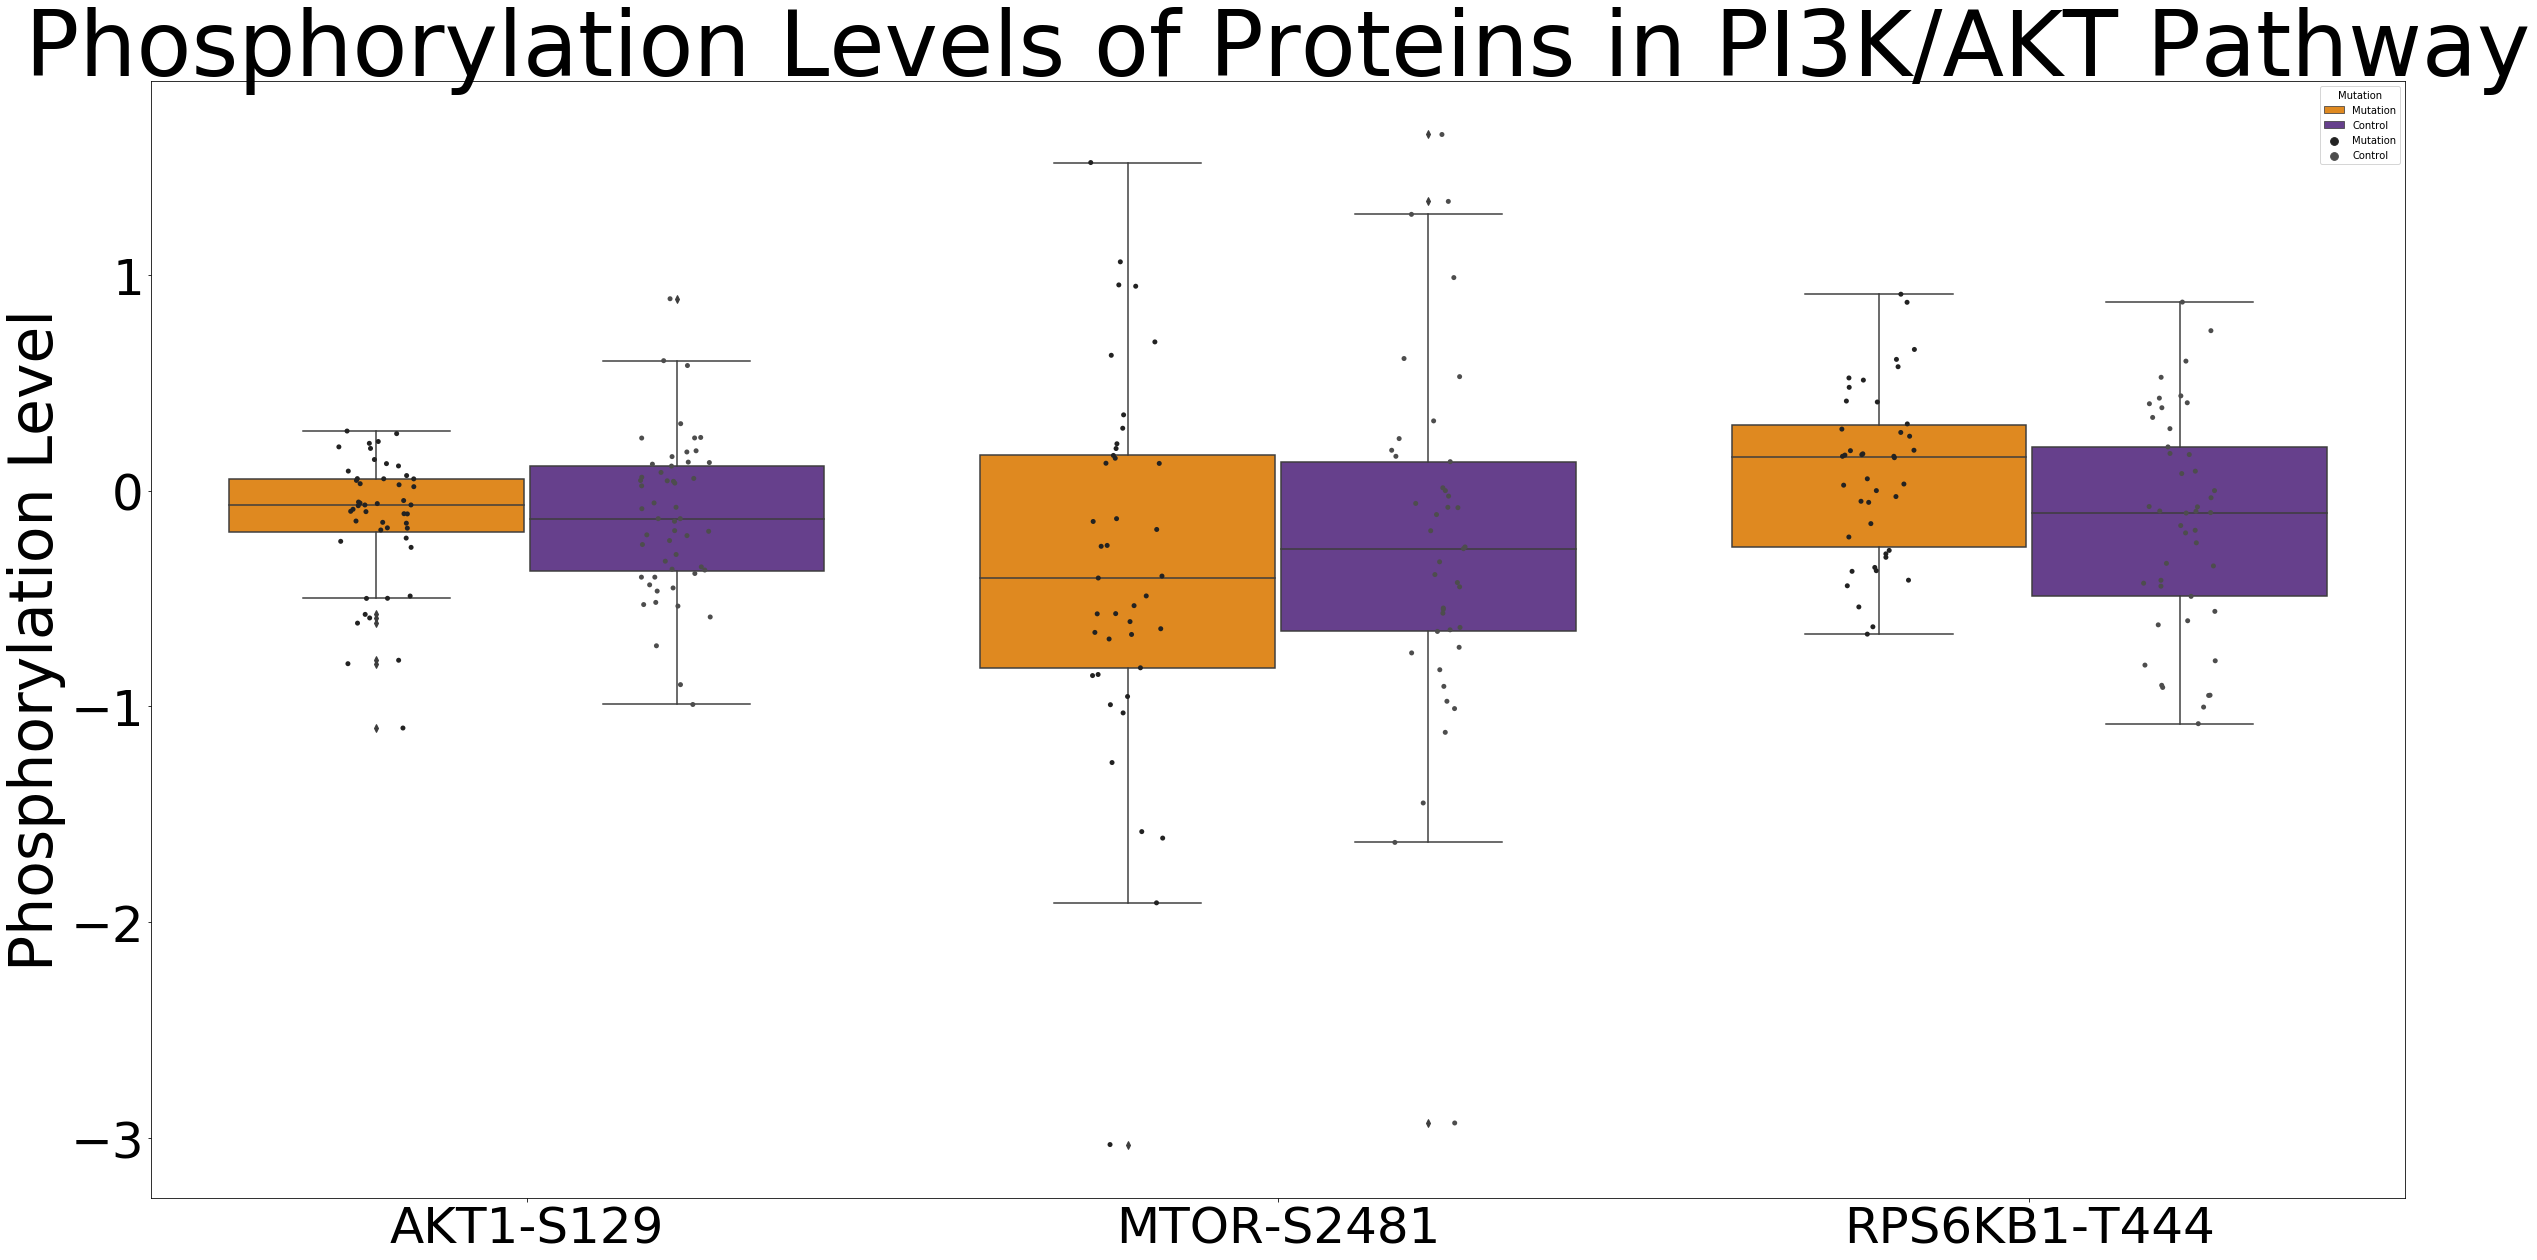

In [22]:
a4_dims = (40.4, 20.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Mutation": "darkorange", "Control": "rebeccapurple"}

#print(plotdf)

#Create the plot
boxplt = sns.boxplot(x='Protein', y='Protein Level', hue='Mutation', data=plotdf, palette=my_pal)
boxplt = sns.stripplot(data=plotdf, x='Protein', y='Protein Level', hue='Mutation', dodge=True, jitter=True, color='.3')

#Add styling
boxplt.set_xlabel('')
boxplt.set_ylabel('Phosphorylation Level', fontsize='60')
boxplt.tick_params(labelsize='50')
boxplt.set_title('Phosphorylation Levels of Proteins in PI3K/AKT Pathway', fontsize = '90')

#Adjust legend
handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles[0:2], ['Mutation', 'Control'], title='PIK3CA Status', fontsize='50', frameon=False)
#boxplt.get_legend().get_title().set_fontsize('50')
#boxplt.get_legend().set_bbox_to_anchor((1, 1, 0, 0))


fig = boxplt.get_figure()
plt.show()